In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download the dataset
dataset_path = kagglehub.dataset_download("camnugent/california-housing-prices")

# Find the CSV file within the downloaded dataset
for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break  # Stop searching once the CSV is found

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Print some info to check if it loaded correctly
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
# Handle missing values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
unique_values = df['ocean_proximity'].unique()
unique_values


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# **Feature Engineering**

1.Use One-Hot Encoding if the categories have no specific order and you prefer to avoid introducing any potential assumptions about the data. This is the most common approach for categorical variables with no inherent ordering (like ocean_proximity).

2.Use Label Encoding only if the categories have a natural order (e.g., "Low", "Medium", "High"), which is not typically the case for ocean_proximity.

3.Use Target Encoding for large datasets or when you want to avoid increasing the number of features with One-Hot Encoding.

Label encoding assigns a numeric value to each category (e.g., 0, 1, 2, etc.), but this could introduce an unintended order (for example, INLAND = 0, NEAR BAY = 1, etc.), which doesn't make sense for this column since there’s no intrinsic ranking of these categories. Therefore, One-Hot Encoding is the preferred choice.

In [10]:
dummies=pd.get_dummies(df.ocean_proximity).astype(int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [11]:
# Drop the original ocean_proximity column from df
df = df.drop('ocean_proximity', axis=1)

# Merge the one-hot encoded dummies into the dataframe
merged = pd.concat([df, dummies], axis='columns')

# Show the final merged dataframe
merged


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [12]:
merged.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Exploratory Data Analysis (EDA)**

Visualizing Geographical Data

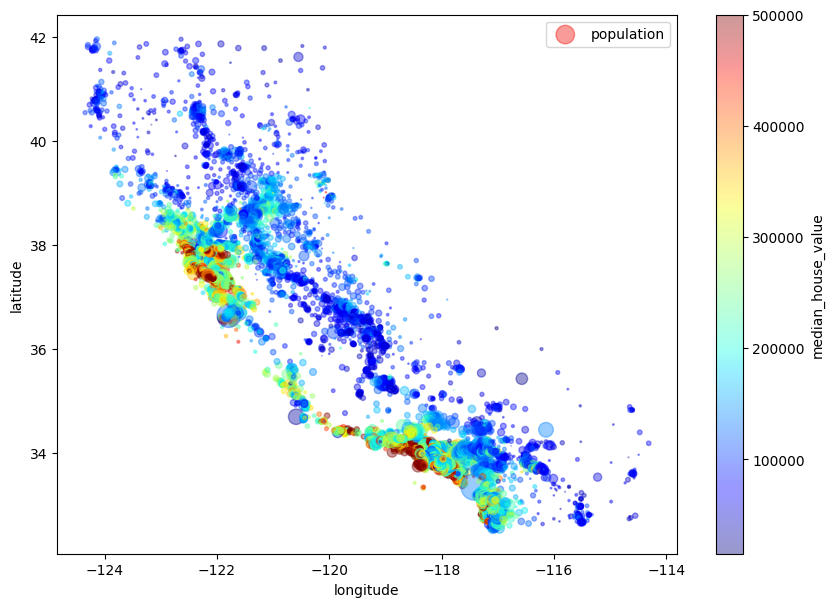

In [13]:
 df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
 )
 plt.legend()

**1.Correlation Matrix:**

This helps you understand how features are correlated with each other and with the target variable (target_column, i.e., house prices). Strong correlations can indicate which features are more likely to be influential for the model.
This heatmap will show you the correlation between all numeric features in the dataset, including the target column (house price), so you can easily spot which features have the highest correlation with house prices.

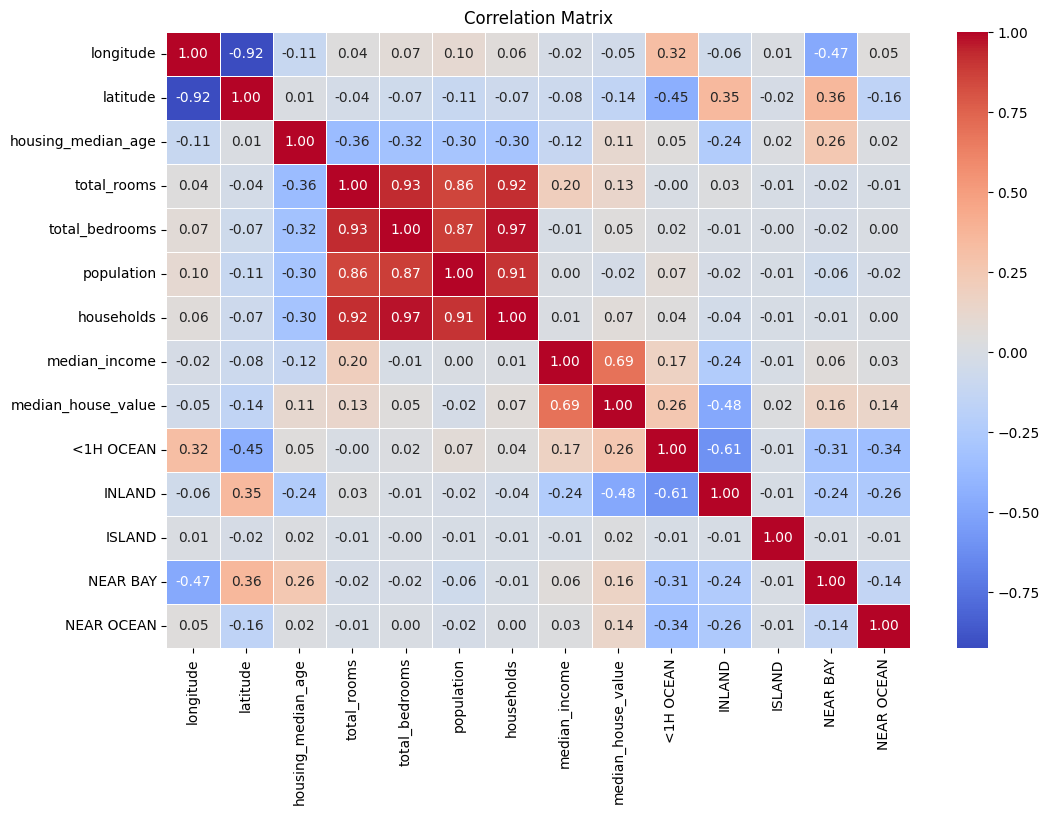

In [14]:
# Correlation matrix
correlation_matrix = merged.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

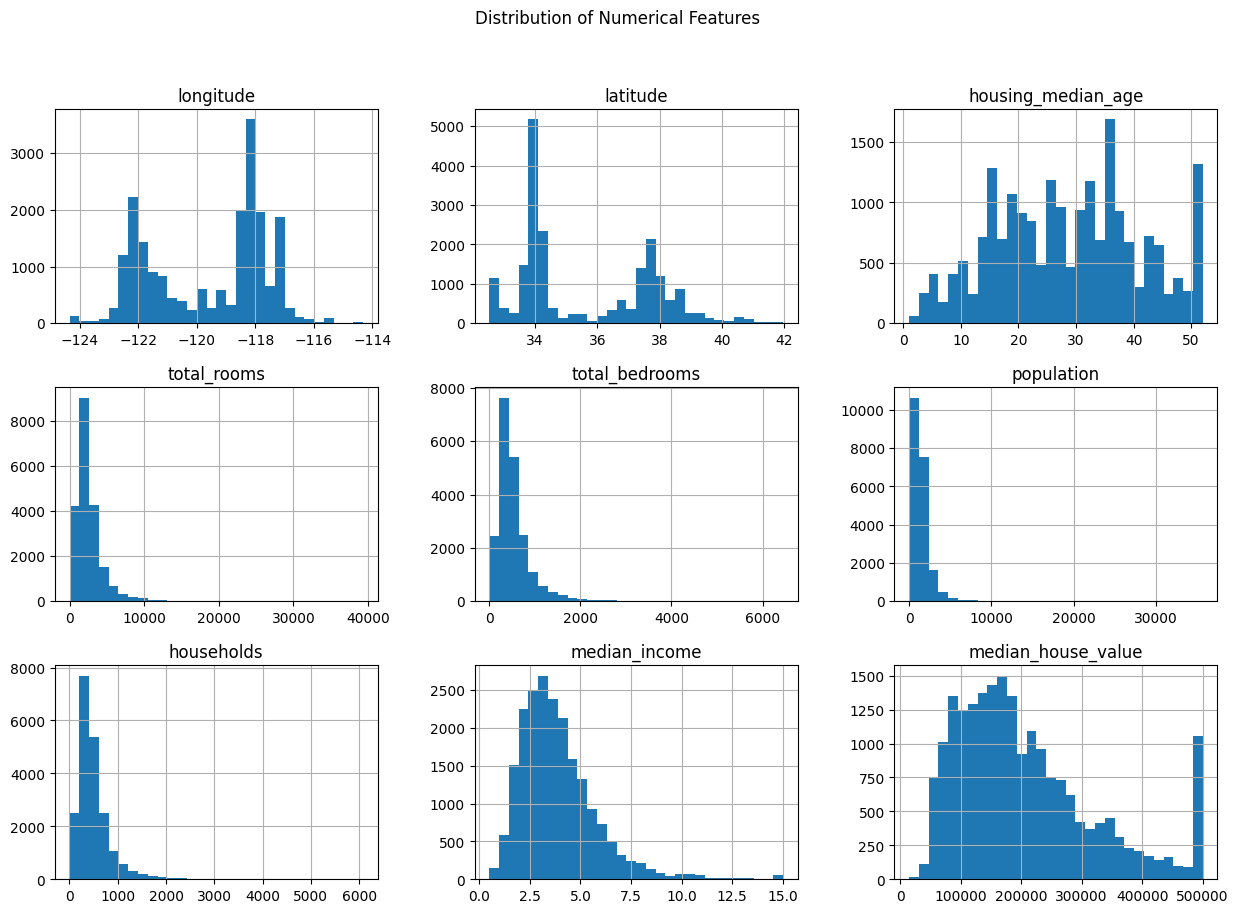

In [15]:
# Plot the distribution of numerical features
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                  'population', 'households', 'median_income', 'median_house_value']

merged[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


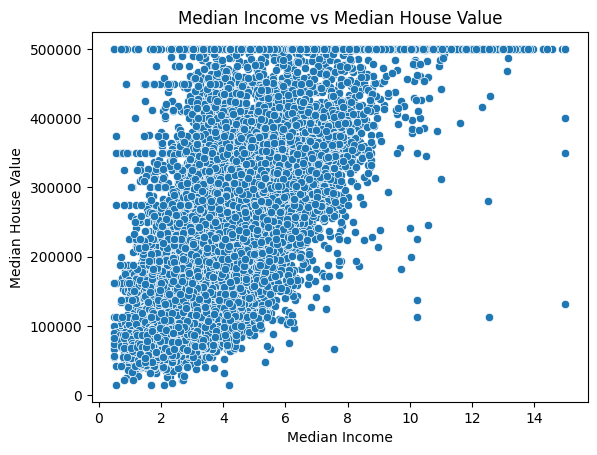

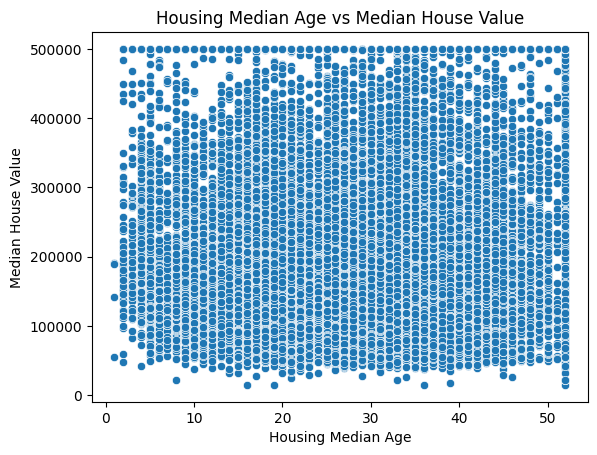

In [16]:
# Scatter plot of 'median_income' vs 'median_house_value'
sns.scatterplot(x='median_income', y='median_house_value', data=merged)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

# Scatter plot of 'housing_median_age' vs 'median_house_value'
sns.scatterplot(x='housing_median_age', y='median_house_value', data=merged)
plt.title("Housing Median Age vs Median House Value")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.show()


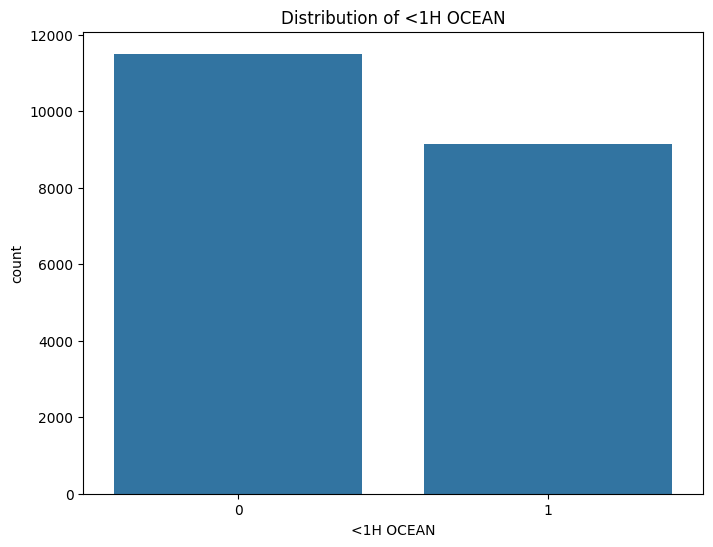

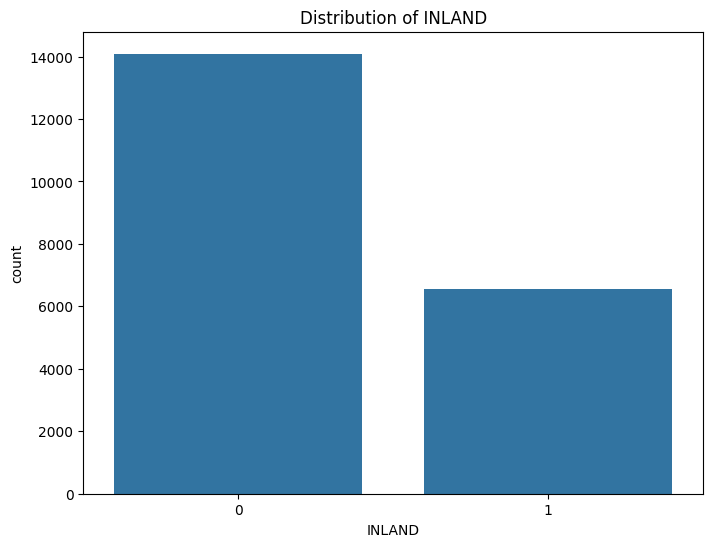

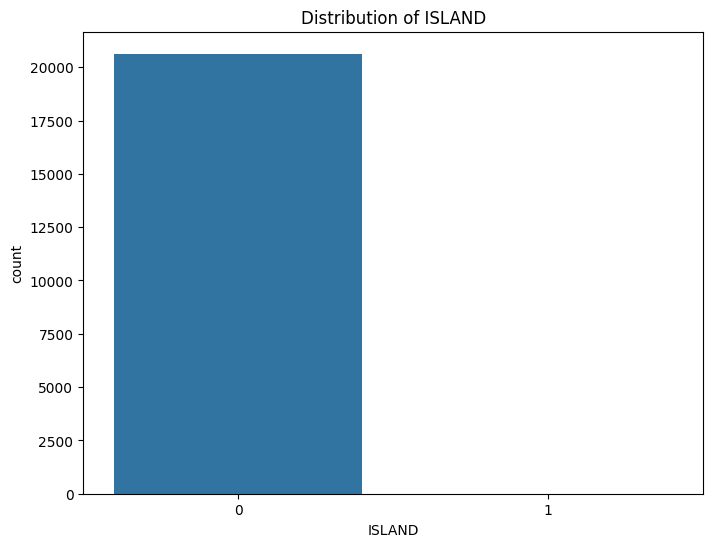

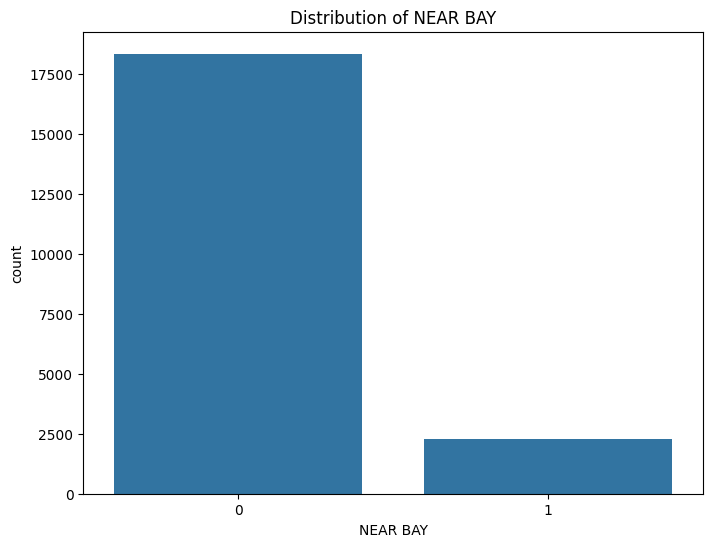

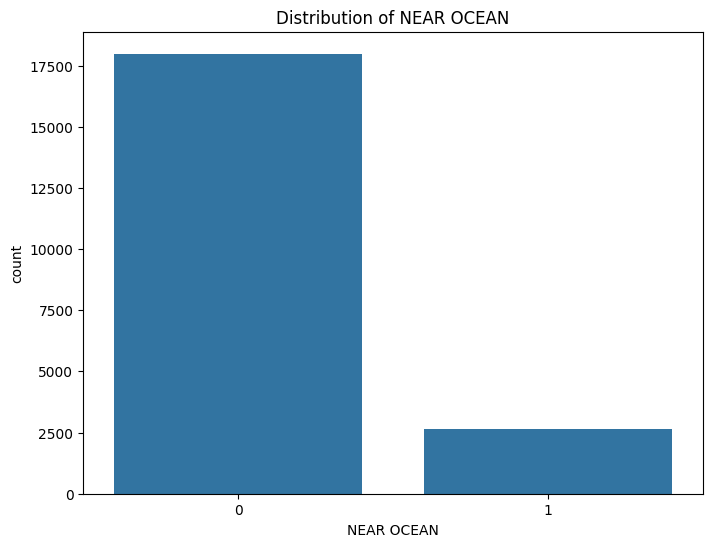

In [17]:
# Visualize distribution of categorical features (after one-hot encoding)
categorical_cols = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

# Count plot for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=merged)
    plt.title(f"Distribution of {col}")
    plt.show()


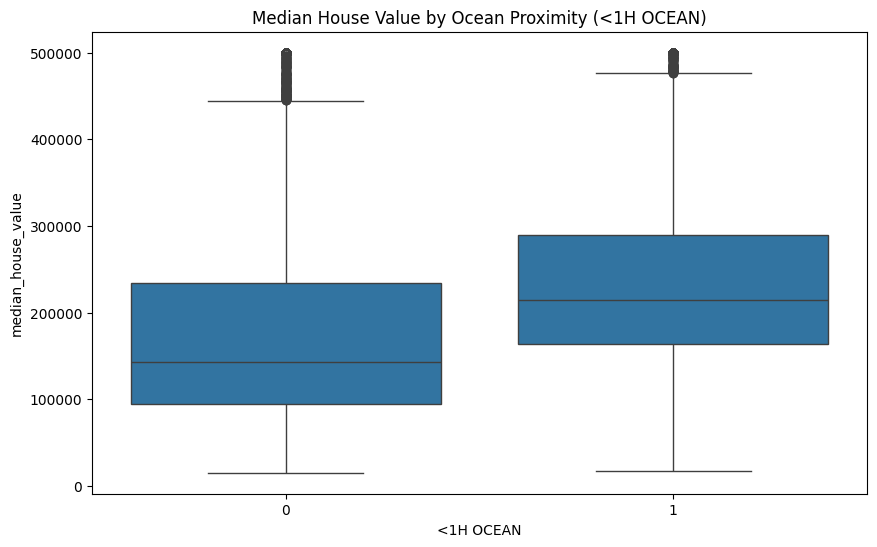

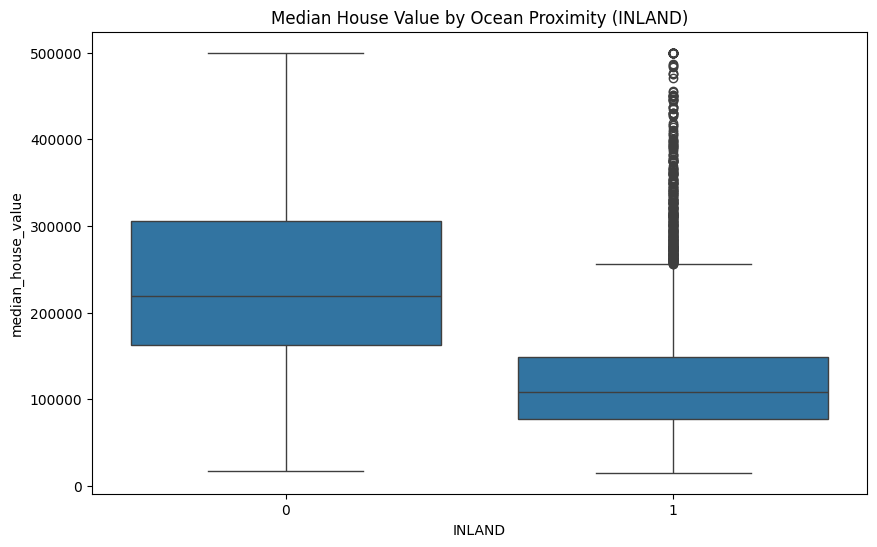

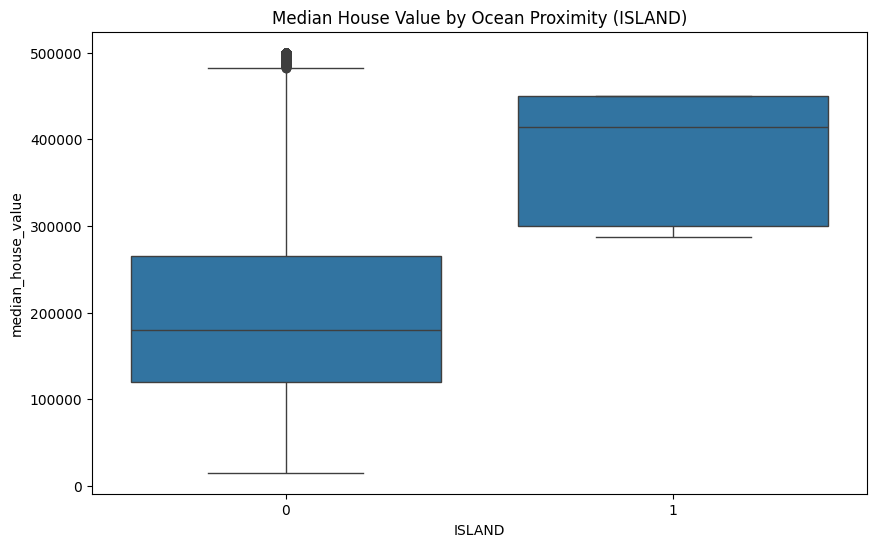

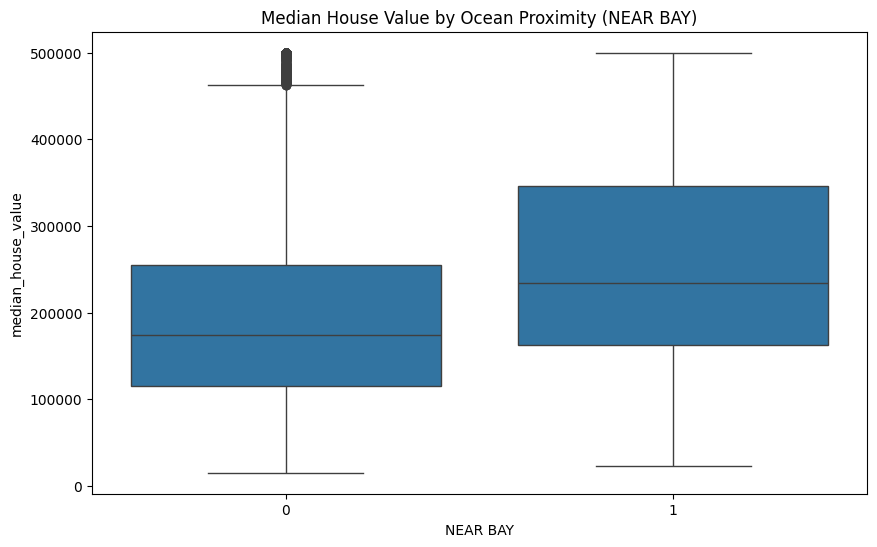

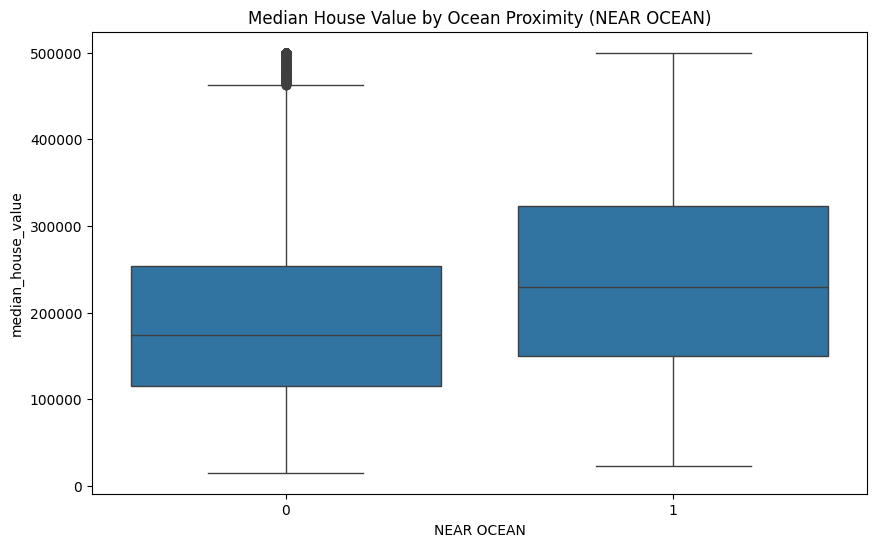

In [18]:
# Boxplot to compare median_house_value across different ocean_proximity categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='<1H OCEAN', y='median_house_value', data=merged)
plt.title('Median House Value by Ocean Proximity (<1H OCEAN)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='INLAND', y='median_house_value', data=merged)
plt.title('Median House Value by Ocean Proximity (INLAND)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='ISLAND', y='median_house_value', data=merged)
plt.title('Median House Value by Ocean Proximity (ISLAND)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NEAR BAY', y='median_house_value', data=merged)
plt.title('Median House Value by Ocean Proximity (NEAR BAY)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NEAR OCEAN', y='median_house_value', data=merged)
plt.title('Median House Value by Ocean Proximity (NEAR OCEAN)')
plt.show()


This set of visualizations will provide a good overview of your data, including:

1.The correlations between numerical features.

2.The distribution of numerical features.

3.Scatter plots to investigate relationships between features and the target variable.

4.The distribution of categorical variables.

5.Box plots to explore the relationship between categorical variables (ocean proximity) and house prices.

# **Split the Data**

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = merged.drop('median_house_value', axis=1)  # Exclude target column
y = merged['median_house_value']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train Linear Regression Model**

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test)


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation metrics
r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_linear)

print(f"Linear Regression Evaluation:")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Linear Regression Evaluation:
R² Score: 0.6254240620553606
Mean Squared Error: 4908476721.156615
Root Mean Squared Error: 70060.52184473518
Mean Absolute Error: 50670.73824097224


# **The RandomForestRegressor Model**

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


In [23]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Regression Evaluation:")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Random Forest Regression Evaluation:
R² Score: 0.8169411111174801
Mean Squared Error: 2398820115.3845725
Root Mean Squared Error: 48977.751228334
Mean Absolute Error: 31636.19363129845


# **1.Gradient Boosting Regressor**
Great at capturing complex patterns.

Often beats Random Forest if tuned well.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


In [25]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradiant boosting regressor:")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Gradiant boosting regressor:
R² Score: 0.7616640926129296
Mean Squared Error: 3123175128.772087
Root Mean Squared Error: 55885.37490947061
Mean Absolute Error: 38259.23990939578


# **XGB regressor Model**

In [26]:
!pip install xgboost


In [27]:
# Rename columns to remove any invalid characters for XGBoost
df.columns = df.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

# Reassign X_train and X_test if needed (in case you did a train-test split earlier)
X_train = X_train.rename(columns={col: col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train.columns})
X_test = X_test.rename(columns={col: col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test.columns})


In [28]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Regression Evaluation:")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


XGBoost Regression Evaluation:
R² Score: 0.8270020909155706
Mean Squared Error: 2266980132.811391
Root Mean Squared Error: 47612.81479613856
Mean Absolute Error: 31606.035237157066


# **Overfitting & Underfitting**
***Overfitting:***

High R² score on training set (e.g., 0.95), but much lower on test set (e.g., 0.80).
Training error is much lower than test error.

***Underfitting:***

Low R² score on both training and test sets (e.g., 0.60 on both).
Training error is also high, indicating the model is not capturing patterns well.

In [30]:
# Rename columns to remove any invalid characters for XGBoost
# NOTE: This is done BEFORE training the RandomForestRegressor
df.columns = df.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

# Reassign X_train and X_test if needed (in case you did a train-test split earlier)
X_train = X_train.rename(columns={col: col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train.columns})
X_test = X_test.rename(columns={col: col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test.columns})

# Now you can train the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Training with the renamed columns

# ... (rest of your code) ...

# Evaluate on training data (using the renamed columns)
y_pred_train = rf_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate on test data (using the renamed columns)
y_pred_test = rf_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

# Print R² scores
print(f"Training R²: {r2_train}")
print(f"Test R²: {r2_test}")

Training R²: 0.9755540095095875
Test R²: 0.8169411111174801


Overfitting:

 our model has a high R² score on the training data (0.975), but the R² score on the test data is lower (0.816). This is a classic sign of overfitting.

The model is capturing noise and specific patterns in the training data that don’t generalize well to the unseen test data.

# **Hyperparameter Tuning (GridSearchCV)**

In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_xgb_model.predict(X_test)


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on test set
y_pred = best_xgb_model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print("Test R²: ", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)


Test R²:  0.8126452373216235
Mean Squared Error:  2455113631.2993755
Mean Absolute Error:  33479.27205356332


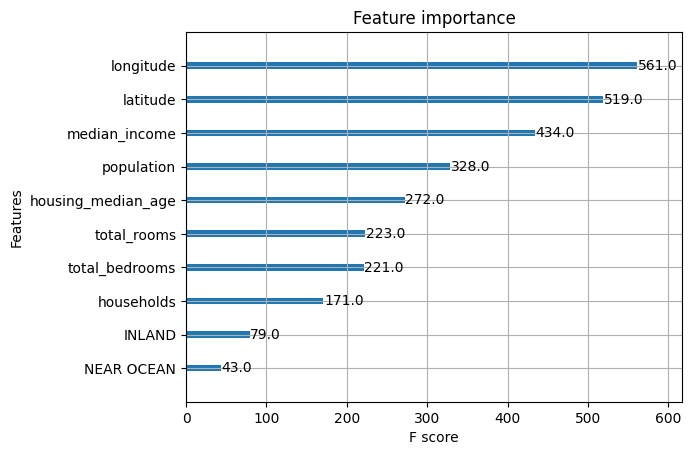

In [34]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(best_xgb_model, importance_type='weight', max_num_features=10)
plt.show()
